**Description of features**  
*Churn*:   1 means customer leave and 0 means customer uses the service  

*Tenure*:   Tenure of customer in organization  

*PreferredLoginDevice*:   Preferred login device of customer like laptop or phone

*CityTier*:   City tier(1,2,3)  

*WarehouseToHome*: Distance in between warehouse to home of customer  

*PreferredPaymentMode*: Preferred payment method of customer  

*Gender*: Gender of customer  

*HourSpendOnApp*: Number of hours spend on mobile application or website  

*NumberOfDeviceRegistered*: Total number of deceives is registered on particular customer  

*PreferedOrderCat*: Preferred order category of customer in last month  

*SatisfactionScore*: Satisfactory score of customer on service  

*MaritalStatus*: Marital status of customer  

*NumberOfAddress*: Total number of added added on particular customer  

*Complain*: Any complaint has been raised in last month  

*OrderAmountHikeFromlastYear*: Percentage increases in order from last year  

*CouponUsed*: Total number of coupon has been used in last month  

*OrderCount*: Total number of orders has been places in last month  

*DaySinceLastOrder*: Day Since last order by customer  

*CashbackAmount*: Average cashback in last month  





**Import Library**

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)   # to see all columns
import matplotlib.pyplot as plt
import seaborn as sns


**Load the dataset and store in pandas dataframe**

In [ ]:
df = pd.read_excel('/content/E Commerce Dataset.xlsx')
df.drop('CustomerID', axis = 1, inplace = True)   # drop the customerID column as it is of no use
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


Use the info function to find the data type of variable

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

Most of the variable are numeric( float and integer) and few are categorical variable

In [ ]:
df.describe()    

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.689165
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
WarehouseToHome                4.458259
Churn                          0.000000
MaritalStatus                  0.000000
Complain                       0.000000
NumberOfAddress                0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
NumberOfDeviceRegistered       0.000000
Gender                         0.000000
PreferredPaymentMode           0.000000
CityTier                       0.000000
PreferredLoginDevice           0.000000
CashbackAmount                 0.000000
dtype: float64


*   7 variable have null value and all are them contain null value below 6%

In [ ]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64



*   For 0 label it contain 4682 value and for 1 label  it contain 948 value, which is the case of imbalance data 



Identify the numeric and categorical variable

In [ ]:
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

numerical_cols = ['Churn', 'Tenure',  'CityTier',
       'WarehouseToHome',  'HourSpendOnApp',
       'NumberOfDeviceRegistered',  'SatisfactionScore',
        'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

In [ ]:
df['PreferredLoginDevice'].value_counts()


Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64



*   As mobile phone and phone are both same so we have merged them


In [ ]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'

In [ ]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [ ]:
df['PreferredPaymentMode'].value_counts()


Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64



*   COD is Cash on Delivery only and CC is credit card, therefore we have merged them



In [ ]:
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'


In [ ]:
df['PreferredPaymentMode'].value_counts()


Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [ ]:
df['Gender'].value_counts()


Male      3384
Female    2246
Name: Gender, dtype: int64

In [ ]:
df['PreferedOrderCat'].value_counts()


Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [ ]:
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'


In [ ]:
df['PreferedOrderCat'].value_counts()


Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [ ]:
df['MaritalStatus'].value_counts()


Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

**Imputing mean value**  
In this null value of variable are replace by the mean value of variable 

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'mean')      
imputer.fit(df[numerical_cols])
df[numerical_cols] = imputer.transform(df[numerical_cols])


In [ ]:
df.isnull().sum()     # checking the null value

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64



*   Now there is no null value present in the dataset



**Scaling the numerical feature**  
As some feature have very high value and some have low value, so to decrease the unwanted influnece on target variable we will use scaling function. for this purpose minmax scaler functon will be use which convert all value between 0 to 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numerical_cols])
df[numerical_cols] = scaler.transform(df[numerical_cols])

In [ ]:
df[numerical_cols]

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1.0,0.065574,1.0,0.008197,0.600000,0.4,0.25,0.380952,1.0,0.000000,0.0625,0.000000,0.108696,0.492107
1,1.0,0.167048,0.0,0.024590,0.600000,0.6,0.50,0.285714,1.0,0.266667,0.0000,0.000000,0.000000,0.372011
2,1.0,0.167048,0.0,0.204918,0.400000,0.6,0.50,0.238095,1.0,0.200000,0.0000,0.000000,0.065217,0.370104
3,1.0,0.000000,1.0,0.081967,0.400000,0.6,1.00,0.333333,0.0,0.800000,0.0000,0.000000,0.065217,0.412536
4,1.0,0.000000,0.0,0.057377,0.586307,0.4,1.00,0.095238,0.0,0.000000,0.0625,0.000000,0.065217,0.398782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,0.163934,0.0,0.204918,0.600000,0.2,0.00,0.238095,0.0,0.466667,0.0625,0.066667,0.086957,0.463737
5626,0.0,0.213115,0.0,0.065574,0.600000,0.8,1.00,0.238095,0.0,0.333333,0.0625,0.066667,0.098772,0.692052
5627,0.0,0.016393,0.0,0.049180,0.600000,0.2,0.75,0.095238,1.0,0.666667,0.0625,0.066667,0.086957,0.573618
5628,0.0,0.377049,1.0,0.032787,0.800000,0.8,0.75,0.142857,0.0,0.266667,0.1250,0.066667,0.195652,0.550478


**Encoding the categorical feature**  
Machine Learning algorithm only take the numeric value that is why categorical variable needed to convert into numeric variable.  
For this purpose One hot Encoding technique will be used.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
encoder.fit(df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)
df[encoded_cols] = encoder.transform(df[categorical_cols])

['PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df[encoded_cols]

,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5626,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5628,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Now merged the variable and form the input variable and target variable

In [ ]:
X = df[numerical_cols + encoded_cols]
X.drop('Churn', axis =1, inplace = True)  # drop the churn variable as it will be target variable
X      # captial X denote that it has more than one input variable eg: x1, x2, x3   

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.065574,1.0,0.008197,0.600000,0.4,0.25,0.380952,1.0,0.000000,0.0625,0.000000,0.108696,0.492107,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.167048,0.0,0.024590,0.600000,0.6,0.50,0.285714,1.0,0.266667,0.0000,0.000000,0.000000,0.372011,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.167048,0.0,0.204918,0.400000,0.6,0.50,0.238095,1.0,0.200000,0.0000,0.000000,0.065217,0.370104,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000000,1.0,0.081967,0.400000,0.6,1.00,0.333333,0.0,0.800000,0.0000,0.000000,0.065217,0.412536,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.057377,0.586307,0.4,1.00,0.095238,0.0,0.000000,0.0625,0.000000,0.065217,0.398782,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.163934,0.0,0.204918,0.600000,0.2,0.00,0.238095,0.0,0.466667,0.0625,0.066667,0.086957,0.463737,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5626,0.213115,0.0,0.065574,0.600000,0.8,1.00,0.238095,0.0,0.333333,0.0625,0.066667,0.098772,0.692052,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.016393,0.0,0.049180,0.600000,0.2,0.75,0.095238,1.0,0.666667,0.0625,0.066667,0.086957,0.573618,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5628,0.377049,1.0,0.032787,0.800000,0.8,0.75,0.142857,0.0,0.266667,0.1250,0.066667,0.195652,0.550478,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y = df['Churn']     # y is a target variable
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5625    0.0
5626    0.0
5627    0.0
5628    0.0
5629    0.0
Name: Churn, Length: 5630, dtype: float64

###Model Building

Part 1

Split the dataset into train and test using the train_test_split function 


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)     # test will be size of 20% 


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix ,precision_score, recall_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest =  RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)

pred_train = random_forest.predict(X_train)
pred_test = random_forest.predict(X_test)

In [ ]:
confusion_matrix(pred_test, y_test)

array([[939,  26],
       [  2, 159]])

In [ ]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(1.0, 0.9751332149200711)

In [ ]:
round(precision_score(pred_test, y_test),4), round(recall_score(pred_test, y_test),4)

(0.8595, 0.9876)

The accuracy and recall score is very high but we need to increase the precision score also

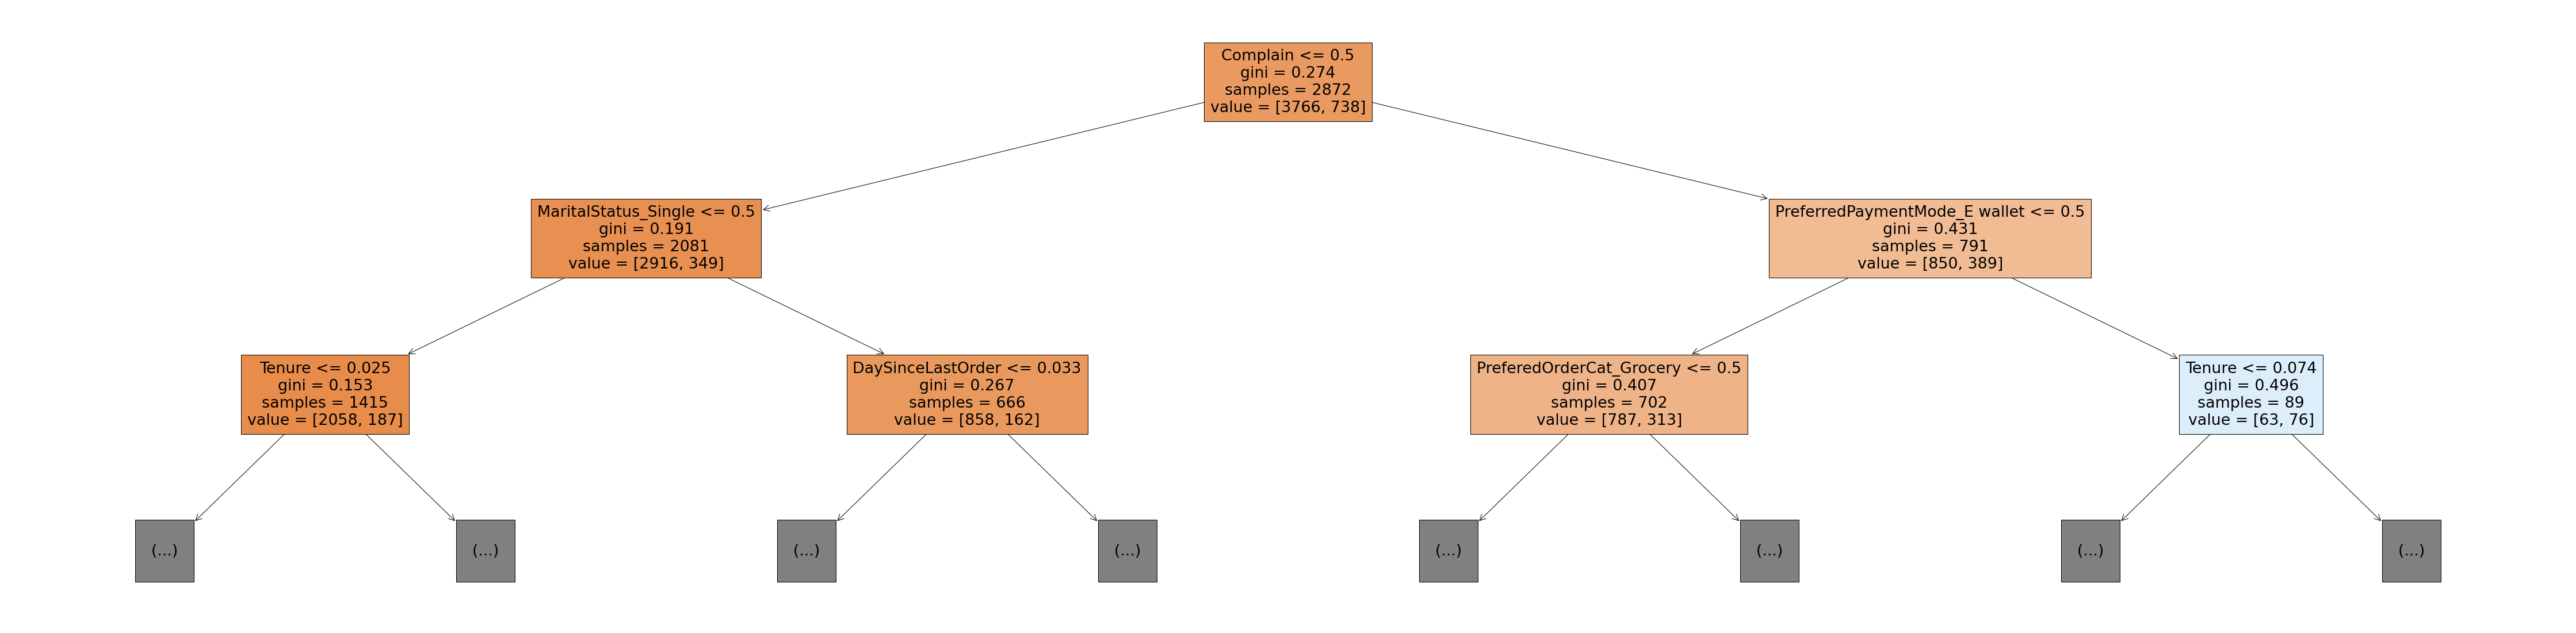

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))      # mention the plot size to be use
random_forest.estimators_[99]   # taking the 100th decision tree 
plot_tree(random_forest.estimators_[99], feature_names = X_train.columns, max_depth =2 , filled = True);   

In [ ]:
importance_df = pd.DataFrame({'feature':X_train.columns,
                            'Importance': random_forest.feature_importances_}).sort_values('Importance', ascending = False)
importance_df.head(10)

,feature,Importance
0,Tenure,0.212094
12,CashbackAmount,0.091158
2,WarehouseToHome,0.068180
7,Complain,0.062292
6,NumberOfAddress,0.059555
11,DaySinceLastOrder,0.058446
8,OrderAmountHikeFromlastYear,0.056989
5,SatisfactionScore,0.049003
4,NumberOfDeviceRegistered,0.032906
10,OrderCount,0.031359


Text(0.5, 1.0, 'Feature Importance')

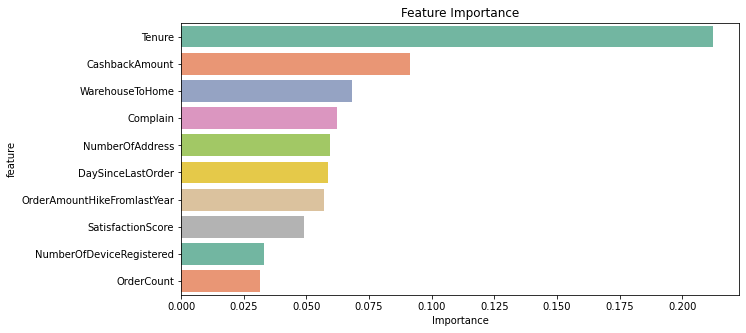

In [ ]:
plt.figure(figsize=(10,5))

sns.barplot(data = importance_df.head(10), x = 'Importance', y = 'feature', palette = 'Set2');
plt.title('Feature Importance')

Part 2  
Doing oversampling of a imbalance data

In [ ]:
sum(y_train == 0 ) ,sum(y_train ==1)

(3741, 763)

As for 1 label there is only 763 instance, we needed to increase it make equal to a 0 label, for this we use SMOTE for oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

X_train_ow, y_train_ow = sm.fit_resample(X_train, y_train)
label_1 = sum(y_train_ow == 1)
label_0 = sum(y_train_ow == 0)

print('Now for 1 label there are {} instance  and for  0 label there are {}'.format(label_1, label_0))

Now for 1 label there are 3741 instance  and for  0 label there are 3741


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_1 =  RandomForestClassifier( random_state = 42)
random_forest_1.fit(X_train_ow, y_train_ow)
pred_train_1 = random_forest_1.predict(X_train_ow)
pred_test_1 = random_forest_1.predict(X_test)

In [ ]:
confusion_matrix(pred_test_1, y_test)


array([[937,  19],
       [  4, 166]])

In [ ]:
round(precision_score(pred_test_1, y_test),4)

0.8973

 Before the oversampling precsion score was  0.8595 and after oversampling precsion score is 0.8973

Part 3  
Hypertunning  of the paramter

In [ ]:
# define the function for testing the parameters
def test_params(**params):
    model = RandomForestClassifier(random_state = 42, n_jobs = 1, **params).fit(X_train_ow, y_train_ow)
    pred_test = model.predict(X_test)
    pred_train = model.predict(X_train_ow)
    train =  round(precision_score(pred_train, y_train_ow),4)  
    test =  round(precision_score(pred_test, y_test),4)  
    return train, test

In [ ]:
def test_param_and_plot_rf(param_name, param_values):
    train_precision, test_precision = [], [] 
    for value in param_values:
        params = {param_name: value}
        train, test = test_params(**params)
        train_precision.append(train)
        test_precision.append(test)
   
   
   
    plt.figure(figsize=(10,6))
    plt.title(param_name)
    plt.plot(param_values, train_precision, 'b-o')
    plt.plot(param_values, test_precision, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Precision score')
    plt.legend(['Training', 'testing'])

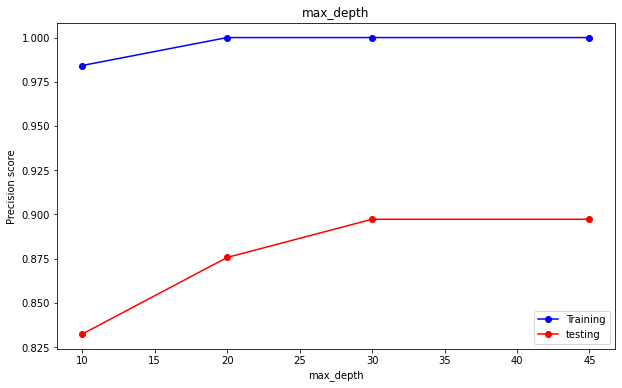

In [ ]:
test_param_and_plot_rf('max_depth', [10, 20, 30, 45])

The best option will be to take max_depth = 30 as precision score is not increase much after that

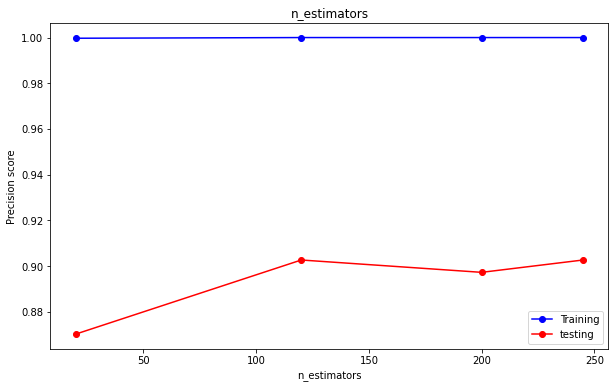

In [ ]:
test_param_and_plot_rf('n_estimators', [20, 120,200, 245])


The best option will be 120 as n_estimators as that point precision score is highest

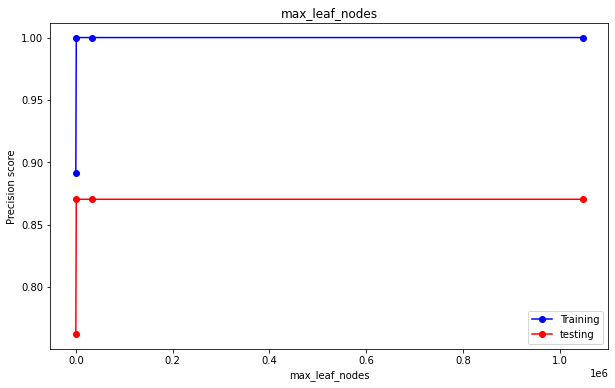

In [ ]:
test_param_and_plot_rf('max_leaf_nodes', [2**5, 2**10, 2**15, 2**20])


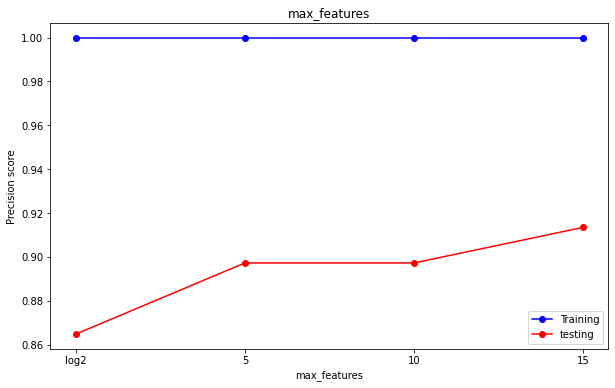

In [ ]:
test_param_and_plot_rf('max_features', ['log2', 5,10, 15])

max features at 15 give highest precision 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_2 =  RandomForestClassifier(max_features= 15 , max_leaf_nodes=2**10, max_depth = 30, n_estimators = 120, random_state = 0 )
random_forest_2.fit(X_train_ow, y_train_ow)

pred_train_2 = random_forest_2.predict(X_train_ow)
pred_test_2 = random_forest_2.predict(X_test)

In [ ]:
round(accuracy_score(pred_test_2, y_test),4)

0.9742

In [ ]:
round(precision_score(pred_test_2, y_test),4)

0.9189

By doing the hypertunning precsion score is increase from 0.8973 to 0.9189

**Base model precison score:    0.8595**   

**After OverSampling precsion score:     0.8973**   

**After Hyper tunning precision score:   0.9189**  
